In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import tools

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/lustre/scratch117/cellgen/team297/kt16/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_header()

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.20.2 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1


In [2]:
# read in the crowley data
adata = sc.read_h5ad('dataset/Chen/chen_11_filtered.h5ad')
adata

AnnData object with n_obs × n_vars = 41516 × 4624
    obs: 'barcode', 'study', 'sample', 'group', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'is_doublet', 'filter_rna', 'leiden'
    var: 'GeneID', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

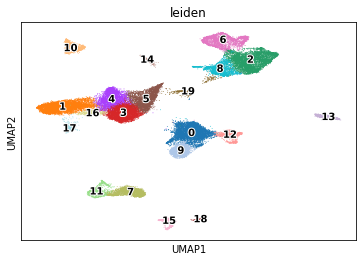

In [3]:
sc.pl.umap(adata, color = 'leiden', legend_loc = 'on data', legend_fontoutline = 2)

In [4]:
sc.tl.leiden(adata, restrict_to = ('leiden', ['12']), resolution = 0.3)

running Leiden clustering
    finished: found 22 clusters and added
    'leiden_R', the cluster labels (adata.obs, categorical) (0:00:00)


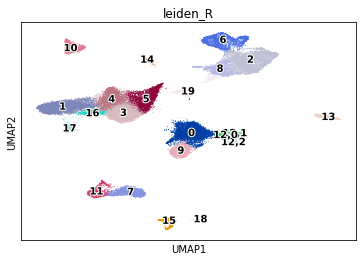

In [5]:
sc.pl.umap(adata, color = 'leiden_R', legend_loc = 'on data', legend_fontoutline = 2)

In [6]:
# perform a wilcoxon rank sum test
sc.tl.rank_genes_groups(adata, groupby = 'leiden_R', method = 'wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:36)


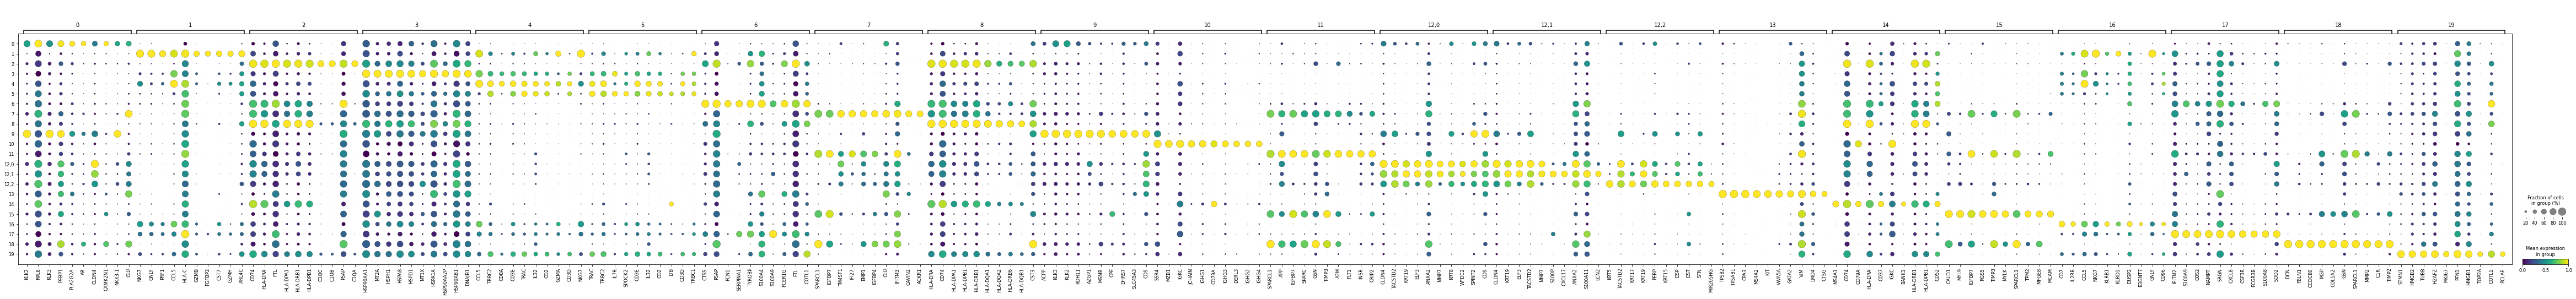

In [7]:
# check top marker genes
sc.pl.rank_genes_groups_dotplot(adata, n_genes = 10, min_logfoldchange = 2, standard_scale = 'var', color_map = 'viridis', dendrogram = False)

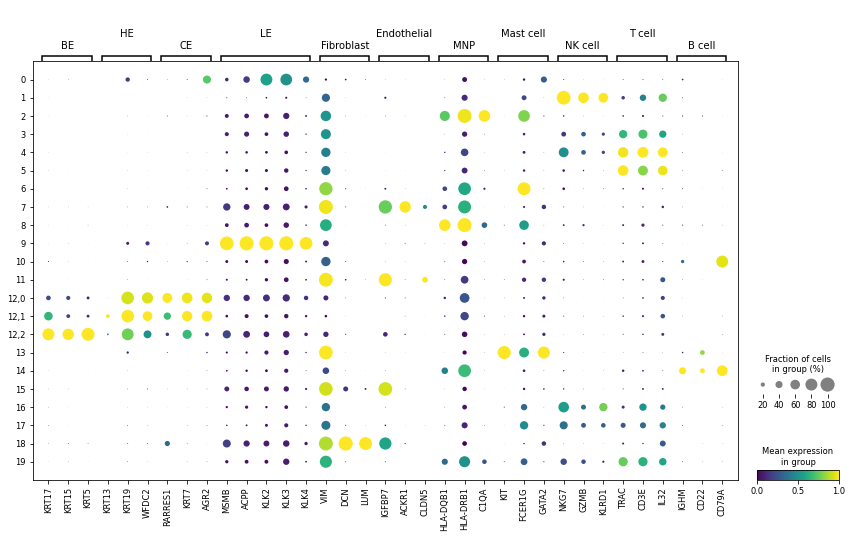

In [8]:
marker_dict = {'BE':['KRT17', 'KRT15', 'KRT5'],
               'HE\n':['KRT13', 'KRT19', 'WFDC2'],
               'CE':['RARRES1', 'KRT7', 'AGR2'],
               'LE\n':['MSMB', 'ACPP', 'KLK2', 'KLK3', 'KLK4'],
               'Fibroblast':['VIM', 'DCN', 'LUM'],
               'Endothelial\n':['IGFBP7', 'ACKR1', 'CLDN5'],
               'MNP':['HLA-DQB1', 'HLA-DRB1', 'C1QA'],
               'Mast cell\n':['KIT', 'FCER1G', 'GATA2'],
               'NK cell':['NKG7', 'GZMB', 'KLRD1'],
               'T cell\n':['TRAC', 'CD3E', 'IL32'],
               'B cell':['IGHM', 'CD22', 'CD79A']}
sc.pl.dotplot(adata, 
                     marker_dict, 
                     standard_scale = 'var', 
                     groupby = 'leiden_R', 
                     var_group_rotation = False, 
                     linewidth = 0,
                     dendrogram = False,
                     color_map = 'viridis')

In [9]:
from tools import returnDEres

In [10]:
returnDEres(adata, column = '11').head(10)

,scores,logfoldchanges,pvals,pvals_adj
SPARCL1,50.829037,6.850089,0.0,0.0
APP,50.403137,5.475022,0.0,0.0
IGFBP7,49.095856,6.647272,0.0,0.0
SPARC,49.045513,7.192513,0.0,0.0
GSN,48.769535,5.087688,0.0,0.0
TIMP3,47.514153,5.960958,0.0,0.0
A2M,47.503399,5.384808,0.0,0.0
FLT1,46.795078,6.767425,0.0,0.0
INSR,46.235828,6.259797,0.0,0.0
CRIP2,45.407093,5.547608,0.0,0.0


In [11]:
returnDEres(adata, column = '18').head(20)

,scores,logfoldchanges,pvals,pvals_adj
DCN,32.021568,10.479688,5.463515e-225,2.179888e-220
FBLN1,31.839144,11.084674,1.860511e-222,3.711626e-218
CCDC80,31.498238,9.769959,9.182864e-218,1.221290e-213
MGP,31.389870,8.025895,2.781878e-216,2.774854e-212
COL1A2,31.195887,9.112551,1.211522e-213,9.667706e-210
GSN,30.901546,6.349519,1.138695e-209,7.572131e-206
SPARCL1,30.543194,7.328919,6.962794e-205,3.968693e-201
MMP2,30.211584,7.371780,1.668618e-200,8.322023e-197
C1R,30.118704,8.141759,2.757332e-199,1.222387e-195
TIMP2,29.687681,5.505177,1.107430e-193,4.418535e-190


In [12]:
returnDEres(adata, column = '2').head(20)

,scores,logfoldchanges,pvals,pvals_adj
CD74,101.676262,4.698963,0.0,0.0
HLA-DRA,101.439964,5.541091,0.0,0.0
FTL,98.854309,3.487426,0.0,0.0
HLA-DPA1,98.105171,4.935853,0.0,0.0
HLA-DRB1,97.286201,4.512750,0.0,0.0
HLA-DPB1,95.026939,4.539174,0.0,0.0
C1QC,87.387062,6.499512,0.0,0.0
C1QB,86.904625,6.656171,0.0,0.0
PSAP,86.586761,3.454078,0.0,0.0
C1QA,85.769089,6.578837,0.0,0.0


In [13]:
from tools import cmp

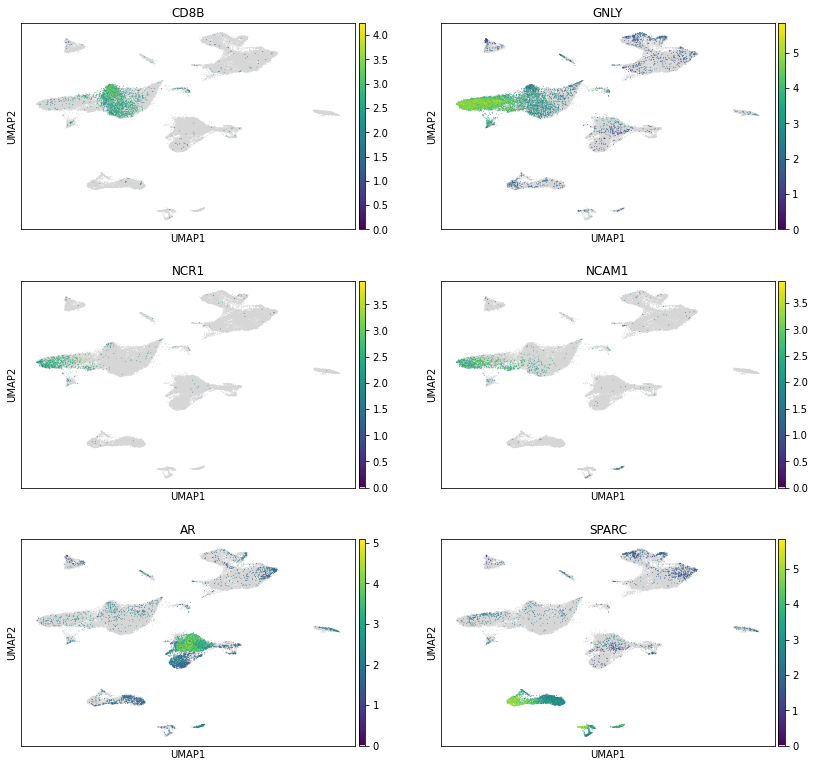

In [14]:
sc.pl.umap(adata, color = ['CD8B', 'GNLY', 'NCR1', 'NCAM1', 'AR', 'SPARC'], color_map = cmp(), ncols = 2)

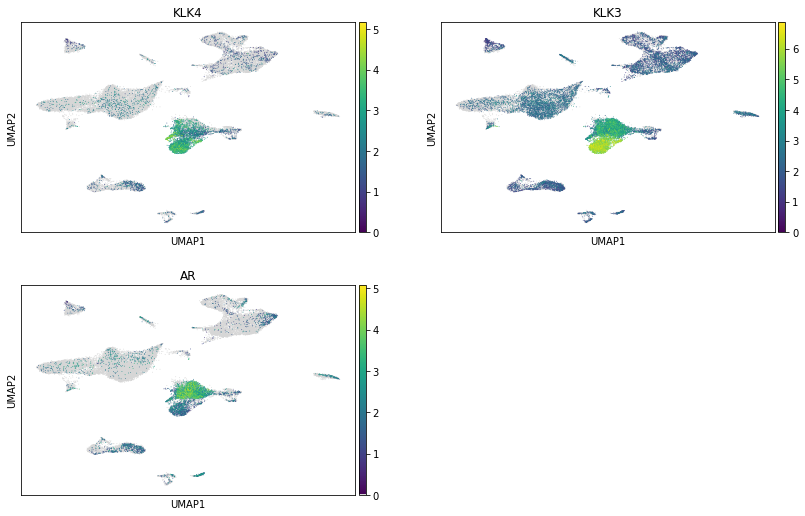

In [15]:
sc.pl.umap(adata, color = ['KLK4', 'KLK3', 'AR'], color_map = cmp(), ncols = 2)

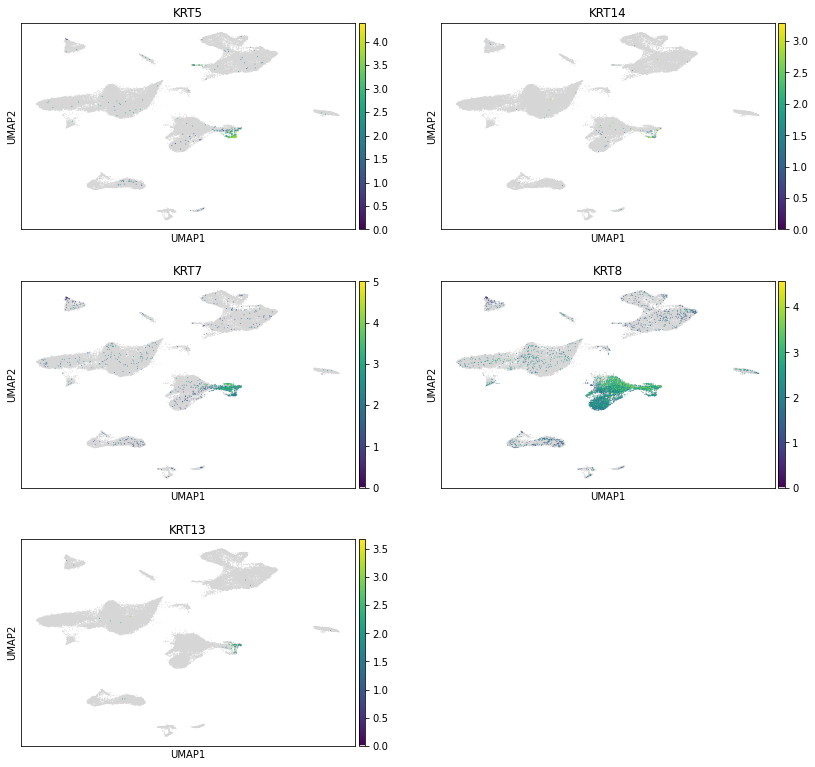

In [16]:
sc.pl.umap(adata, color = ['KRT5', 'KRT14', 'KRT7', 'KRT8', 'KRT13'], color_map = cmp(), ncols = 2)

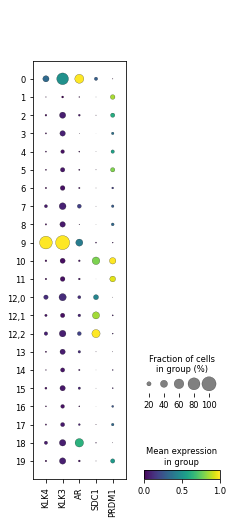

In [17]:
sc.pl.dotplot(adata, ['KLK4', 'KLK3', 'AR', 'SDC1', 'PRDM1'], groupby = 'leiden_R', standard_scale = 'var', color_map = 'viridis')

In [18]:
cols = {'BE': '#1c4481',
        'CE/HE': '#1f77b4',
        'LE-KLK3': '#5b8ba1',
        # 'LE-KLK4': '#b4d5de',
        'Fibroblast': '#59a14f',
        'Myofibroblast': '#59a14f',
        'Endothelial': '#8cd17d',
        'MNP': '#c7233b',
        'Mast cell': '#d37295',
        'NK cell': '#ff9d9a',
        'T cell': '#f28e2b',
        'T cell_cycling': '#f28e2b',
        'B cell': '#fcbf10',
        'Plasmablast': '#fcbf10',
        # 'Sperm': '#727272',
        # 'Erythrocyte': '#727272',
        'Neutrophil': '#727272',
       }

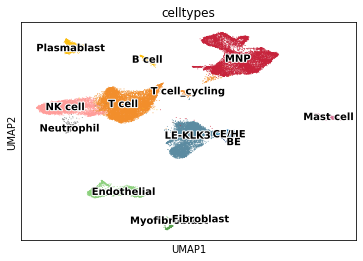

In [19]:
celltypes = {
'0':'LE-KLK3',
'1':'NK cell',
'2':'MNP',
'3':'T cell',
'4':'T cell',
'5':'T cell',
'6':'MNP',
'7':'Endothelial',
'8':'MNP',
'9':'LE-KLK3',
'10':'Plasmablast',
'11':'Endothelial',
'12,0':'CE/HE',
'12,1':'CE/HE',
'12,2':'BE',
'13':'Mast cell',
'14':'B cell',
'15':'Myofibroblast',
'16':'NK cell',
'17':'Neutrophil',
'18':'Fibroblast',
'19':'T cell_cycling',
}
adata.obs['celltypes'] = [celltypes[l] for l in adata.obs['leiden_R']]
adata.obs['celltypes'] = adata.obs['celltypes'].astype('category')
adata.obs['celltypes'] = adata.obs['celltypes'].cat.reorder_categories([k for k in cols.keys() if k in list(adata.obs['celltypes'])])
sc.pl.umap(adata, color = 'celltypes', palette = cols, legend_loc = 'on data', legend_fontoutline = 2)

In [20]:
adata

AnnData object with n_obs × n_vars = 41516 × 4624
    obs: 'barcode', 'study', 'sample', 'group', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'is_doublet', 'filter_rna', 'leiden', 'leiden_R', 'celltypes'
    var: 'GeneID', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'umap', 'leiden_R_colors', 'rank_genes_groups', 'celltypes_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [21]:
adata.write_h5ad('dataset/Chen/chen_11_filtered.h5ad', compression = 'gzip')

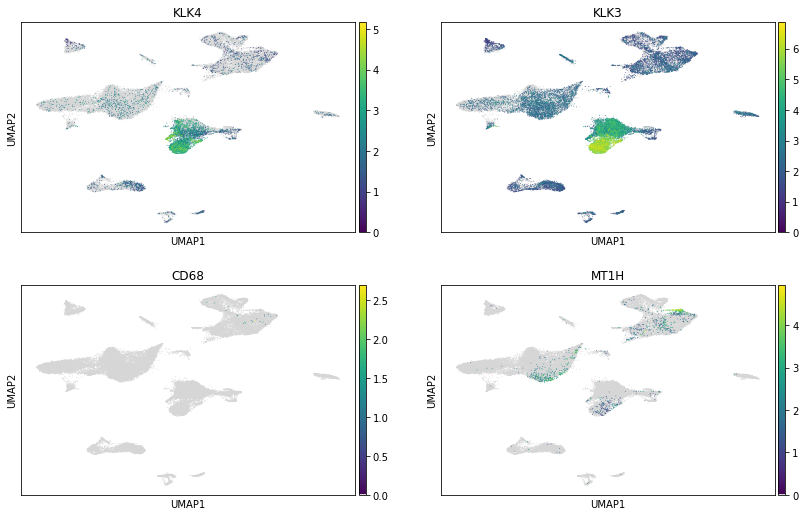

In [22]:
sc.pl.umap(adata, color = ['KLK4', 'KLK3', 'CD68', 'MT1H'], color_map = cmp(), ncols = 2)